In [3]:
import os

#=====RUN NAME INPUT=====#
manualRun = True # If true enter runName, else uses newest run
runName = "Run0003" # Name of run in Analysis/Runs/
#========================#

if manualRun: print( "Run Selection Method: Manual Input \nRun Name:", runName )
else: print( "Run Selection Method: Automatic" )

Run Selection Method: Manual Input 
Run Name: Run0003


In [4]:

import sys

os.chdir( "/Users/noaheverett/Documents/Codes/crm non-repo/crm [2]/Analysis/Runs" )

if not manualRun:
    runs = sorted( os.listdir( os.getcwd() ) )
    if runs[ -1 ] == ".DS_Store":
        runName = runs[ len( runs ) - 2 ]
    else:
        runName = runs[ -1 ]

    if runName == ".DS_Store":
        sys.exit( "No data files found in", str( os.getcwd() ) )

os.chdir( str( os.getcwd() ) + "/" + runName )

print( "Run Name:", runName )
print( "Run Path:", os.getcwd() )

Run Name: Run0003
Run Path: /Users/noaheverett/Documents/Codes/crm non-repo/crm [2]/Analysis/Runs/Run0003


In [5]:
import pandas as pd
import datetime as dt

dataTypes = [ "Actual Time", "Run Time", "Date Time", "Temperature_MS8607", "Temperature_DHT22", "Humidity_MS8607", "Humidity_DHT22", "Pressure", "Dust_PM10Standard", "Dust_PM25Standard", "Dust_PM100Standard", "Dust_PM10Env", "Dust_PM25Env", "Dust_PM100Env", "Dust_Particles03um", "Dust_Particles05um", "Dust_Particles10um", "Dust_Particles25um", "Dust_Particles50um", "Dust_Particles100", "VolatileOrganicCompounds_eCO2", "VolatileOrganicCompounds_TVOC" ]

data0 = pd.read_csv( str( os.getcwd() ) + "/Data0.csv", header = 0, names = dataTypes, index_col = False )
data1 = pd.read_csv( str( os.getcwd() ) + "/Data1.csv", header = 0, names = dataTypes, index_col = False )

if data0.size > data1.size:
    data = data0
    dataFileName = "Data0.csv"
else:
    data = data1
    dataFileName = "Data1.csv"

for dataType in dataTypes:
    if dataType != "Date Time":
        data[ dataType ] = pd.to_numeric( data[ dataType ], downcast = "float" )

data[ "Date Time" ] = pd.to_datetime( data[ "Date Time" ] )
        
print( "Run Path:", str( os.getcwd() ) + "/" + dataFileName )

# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print( data )
# data.head( 10 )
# data.tail( 10 )
# dataFile0.head( 5 )
# dataFile0.tail( 5 )
# dataFile1.head( 5 )
# dataFile1.tail( 5 )

Run Path: /Users/noaheverett/Documents/Codes/crm non-repo/crm [2]/Analysis/Runs/Run0003/Data0.csv


In [6]:
# Plot settings
alpha = [ 1.0, 0.8 ]
fontSize_title = 20
fontSize_label = 18
lineWidth = 3

def plotAxis( ax, title, label, graphData, configuration ):
    for n in range( len( graphData ) ):
        ax.plot( data[ "Date Time" ], data[ graphData[ n ] ], linewidth = lineWidth, label = label[ n ], color = configuration[ "color" ][ n ], alpha = alpha[ n ] )
        ax.set_xlim( data[ "Date Time" ][ 0 ], data[ "Date Time" ].iloc[ -1 ] )

    if configuration[ "manualLimit" ]: ax.set_ylim( configuration[ "yLower" ], configuration[ "yUpper" ] )
    if configuration[ "legend" ]: ax.legend( loc = "upper right", fontsize = fontSize_label )
    if configuration[ "logScale" ]: ax.set_yscale( "log" )
    ax.set_ylabel( title, fontsize = fontSize_title )
    ax.tick_params( axis = "both", labelsize = fontSize_label )
    ax.grid()

def plotTwinAxis( ax, title, label, graphData, configuration ):
    line = []

    for n in [ 0, 1 ]:
        line.append( ax[ n ].plot( data[ "Date Time" ], data[ graphData[ n ] ], linewidth = lineWidth, color = configuration[ n ][ "color" ], alpha = alpha[ n ] ) )
        ax[ n ].set_xlim( data[ "Date Time" ][ 0 ], data[ "Date Time" ].iloc[ -1 ] )
        if configuration[ n ][ "manualLimit" ]: ax[ n ].set_ylim( configuration[ n ][ "yLower" ], configuration[ n ][ "yUpper" ] )
        if configuration[ n ][ "logScale" ]: ax[ n ].set_yscale( "log" )
        ax[ n ].tick_params( axis = "y", labelsize = fontSize_label, labelcolor = configuration[ n ][ "color" ] )
        ax[ n ].grid()

    ax[ 0 ].set_ylabel( title, fontsize = fontSize_title )
    ax[ 0 ].tick_params( axis = "x", labelsize = fontSize_label )
    ax[ 0 ].legend( line[ 0 ] + line[ 1 ], [ label[ 0 ], label[ 1 ] ], loc = "upper right", fontsize = fontSize_label )
    ax[ 1 ].legend( line[ 0 ] + line[ 1 ], [ label[ 0 ], label[ 1 ] ], loc = "upper right", fontsize = fontSize_label )

def plot( config ):
    fig, ( ax_temperature, ax_humidity, ax_pressure, ax_dust03, ax_voc ) = plt.subplots( 5, figsize = ( 32, 18 ) )
    ax_dust05 = ax_dust03.twinx()
    ax_co2 = ax_voc.twinx()

    plotAxis( ax_temperature, "Temperature (" + u"\N{DEGREE SIGN}C)", [ "MS8067", "DHT22" ], [ "Temperature_MS8607", "Temperature_DHT22" ], config[ "config_temperature" ] )
    plotAxis( ax_humidity, "Humidity (%)", [ "MS8607", "DHT22" ], [ "Humidity_MS8607", "Humidity_DHT22" ], config[ "config_humidity" ] )
    plotAxis( ax_pressure, "Pressure (torr)", [ None ], [ "Pressure" ], config[ "config_pressure" ] )
    plotTwinAxis( [ ax_dust03, ax_dust05 ], "Particles", [ "> 0.3" + u"\u03bcm", "> 0.5" + u"\u03bcm" ], [ "Dust_Particles03um", "Dust_Particles05um" ], [ config[ "config_dust03" ], config[ "config_dust05" ] ] )
    plotTwinAxis( [ ax_voc, ax_co2 ], "VOC", [ "Total VOC", "Equivalent CO2" ], [ "VolatileOrganicCompounds_TVOC", "VolatileOrganicCompounds_eCO2" ], [ config[ "config_voc" ], config[ "config_co2" ] ] )

    ax_temperature.set_title( runName + " Data", fontweight = "bold", fontsize = 25 )
    fig.set_facecolor( "white" )
    fig.tight_layout()

    return fig

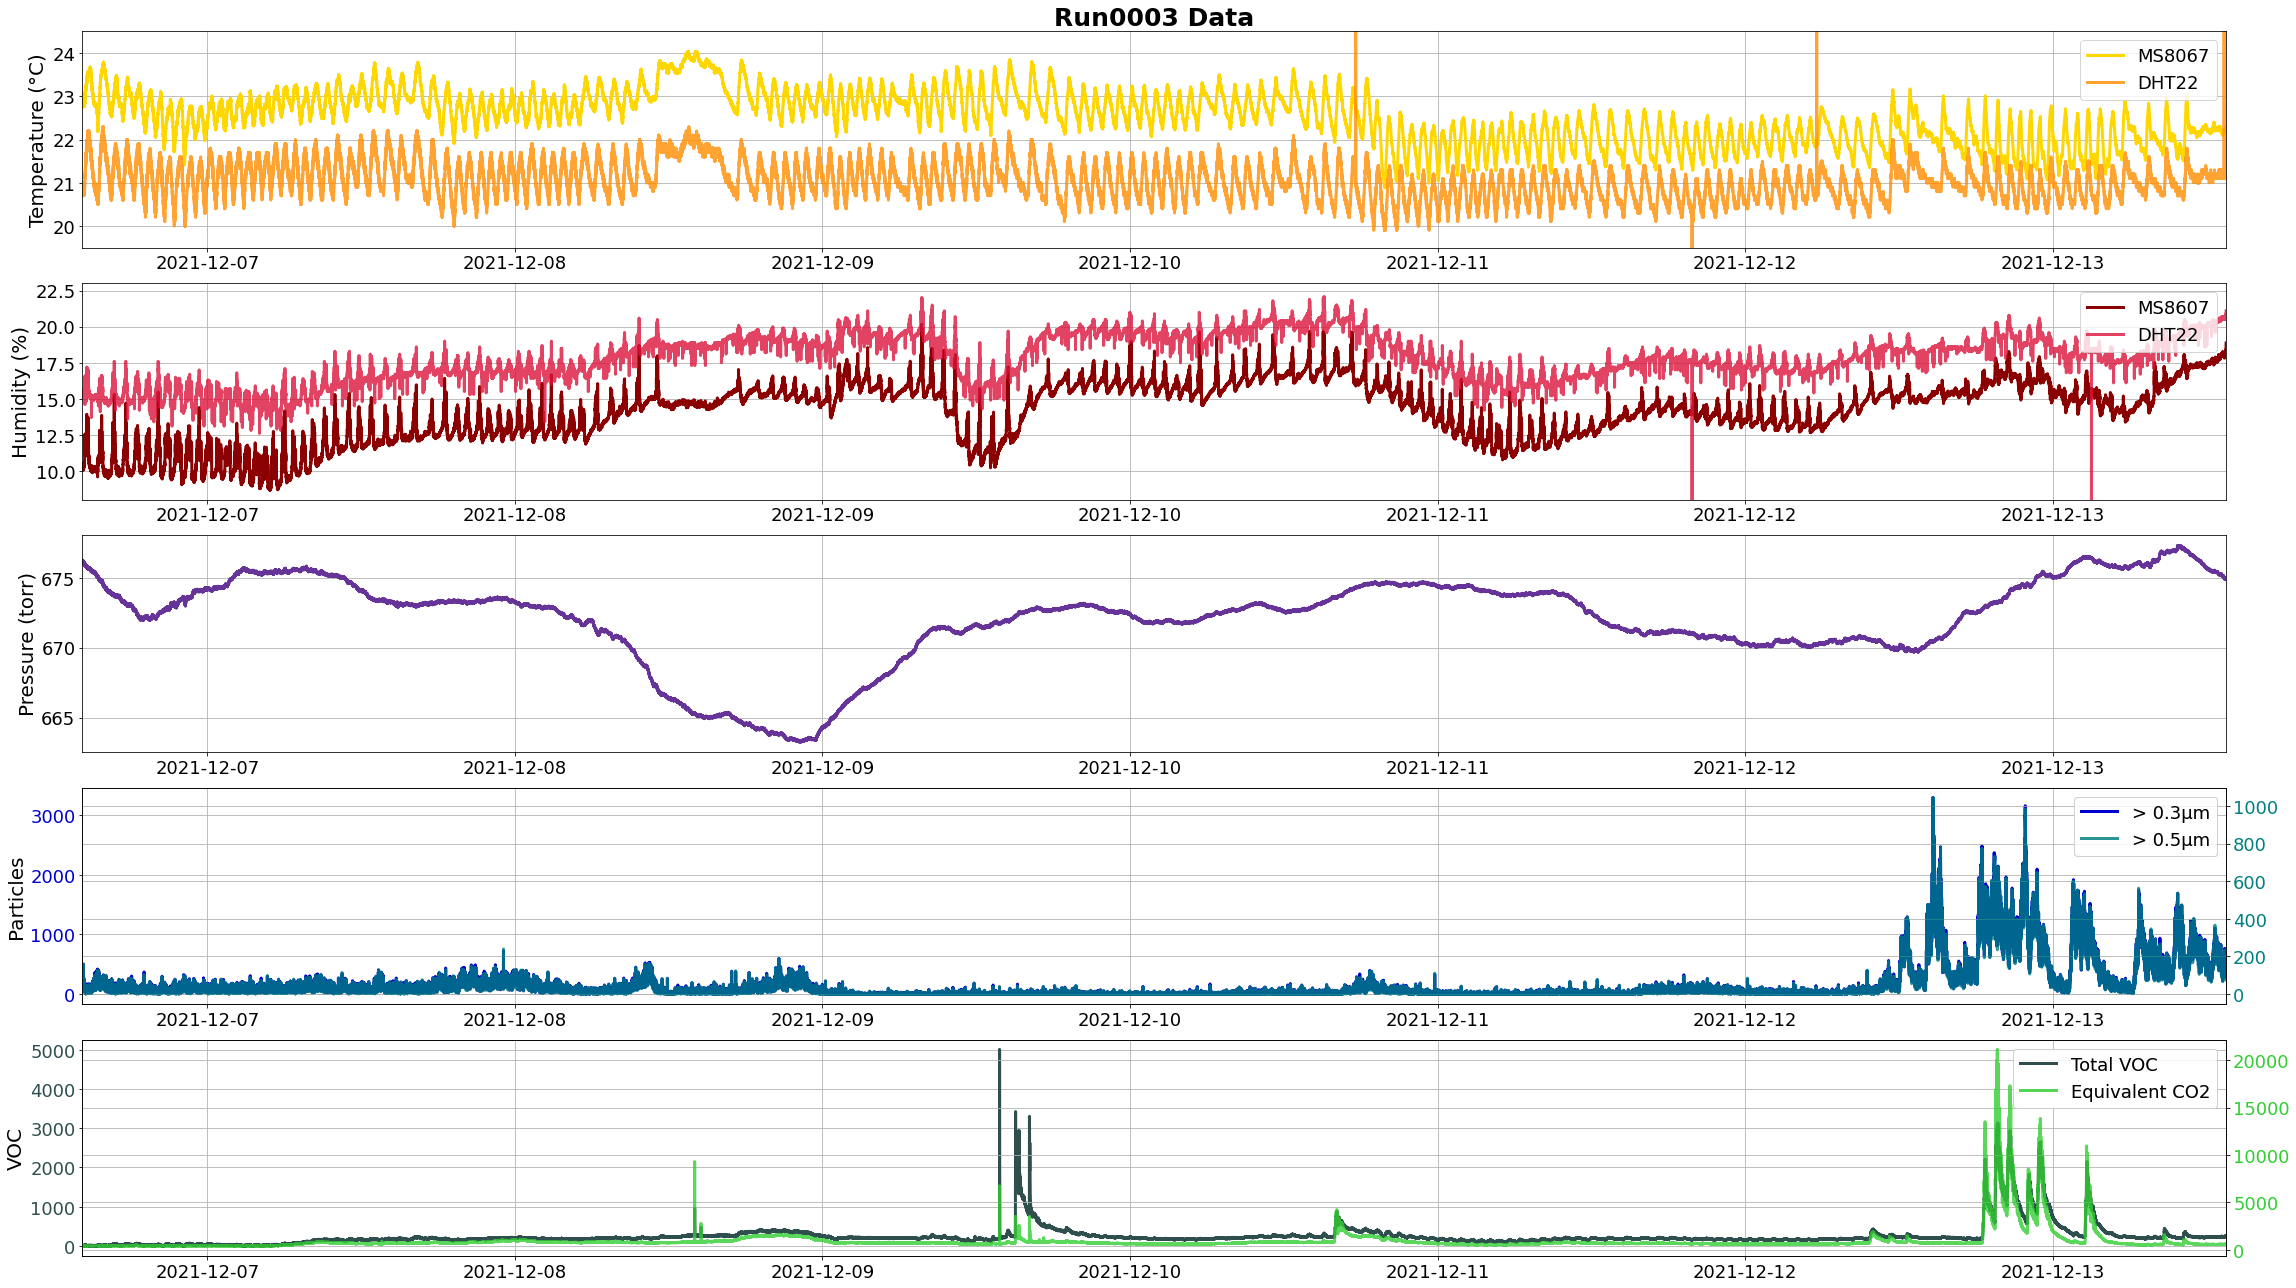

In [7]:
import matplotlib.pyplot as plt

#=====PLOT CONFIGURATION SETTINGS INPUT=====#
config = { "config_temperature": { "manualLimit": True,  "yLower": 19.5,  "yUpper": 24.5, "legend": True,  "logScale": False, "color": [ "gold", "darkorange" ]  },
           "config_humidity"   : { "manualLimit": True,  "yLower": 8,     "yUpper": 23,   "legend": True,  "logScale": False, "color": [ "darkred", "crimson" ]  },
           "config_pressure"   : { "manualLimit": False, "yLower": 25,    "yUpper": 40,   "legend": False, "logScale": False, "color": [ "rebeccapurple"       ] },
           "config_dust03"     : { "manualLimit": False, "yLower": 0,     "yUpper": 500,                   "logScale": False, "color":   "mediumblue"            },
           "config_dust05"     : { "manualLimit": False, "yLower": 0,     "yUpper": 150,                   "logScale": False, "color":   "teal"                  },
           "config_voc"        : { "manualLimit": False, "yLower": 0,     "yUpper": 40,                    "logScale": False, "color":   "darkslategray"         },
           "config_co2"        : { "manualLimit": False, "yLower": 400,   "yUpper": 450,                   "logScale": False, "color":   "limegreen"             } }
#===========================================#

fig = plot( config )

In [8]:
#=====SAVE PLOT INPUT=====#
savePlot = True
#=========================#

if savePlot: fig.savefig( runName + " Plot.png", facecolor = "w", transparent = False, format = "png" )